In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [13]:
data=pd.read_csv('Iris.csv',index_col='Id')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
train=data.iloc[:,:-1]

In [96]:
lb=LabelEncoder()

In [23]:
ml=KMeans(2)

In [39]:
error=[]
for i in range(1,11):
    ml=KMeans(n_clusters=i)
    ml.fit(train)
    error.append(ml.inertia_)

Text(0, 0.5, 'error within the clusters')

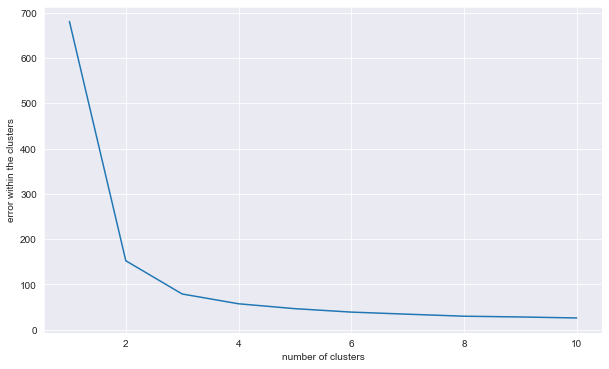

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error)
plt.xlabel('number of clusters')
plt.ylabel('error within the clusters')

based on elbow method we can sce that n_cluster=3 will be the optimal selection

In [47]:
ml=KMeans(n_clusters=3)

In [111]:
kmean=ml.fit_predict(train)

In [112]:
#pd.concat([train,pd.Series(kmean,index=(range(1,len(kmean)+1)))],axis=1)

In [116]:
pd.DataFrame(lb.fit_transform(data.iloc[:,-1]),index=data.iloc[:,-1])

,0
Species,
Iris-setosa,0
Iris-setosa,0
Iris-setosa,0
Iris-setosa,0
Iris-setosa,0
...,...
Iris-virginica,2
Iris-virginica,2
Iris-virginica,2


In [120]:
ki=[]
for i in kmean:
    if i ==1:
        ki.append(0)
    elif i==0:
        ki.append(2)
    elif i==2:
        ki.append(1)

In [121]:
ki

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1]

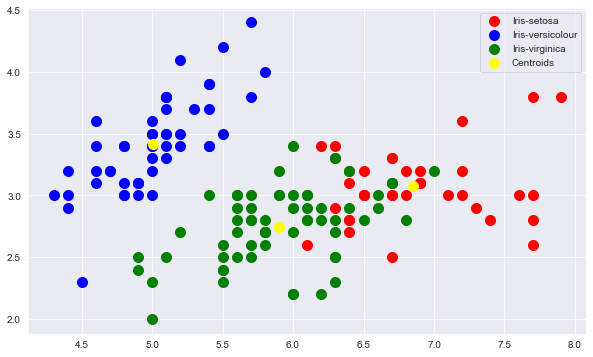

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(train.iloc[:,0][kmean==0], train.iloc[:,1][kmean==0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(train.iloc[:,0][kmean==1], train.iloc[:,1][kmean==1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(train.iloc[:,0][kmean==2], train.iloc[:,1][kmean==2], 
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(ml.cluster_centers_[:, 0],ml.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [122]:
print(confusion_matrix(lb.fit_transform(data.iloc[:,-1]),ki))
print(classification_report(lb.fit_transform(data.iloc[:,-1]),ki))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

